In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

In [9]:
file_path = 'bank-additional-full.csv'
data = pd.read_csv(file_path, sep=';')

In [10]:
selected_features = ["age", "job", "marital", "education", "housing", "loan", "contact", "y"]
X = data[selected_features[:-1]]
y = data[selected_features[-1]]

In [11]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8871085214857976
              precision    recall  f1-score   support

          no       0.89      1.00      0.94      7303
         yes       0.56      0.03      0.05       935

    accuracy                           0.89      8238
   macro avg       0.72      0.51      0.50      8238
weighted avg       0.85      0.89      0.84      8238



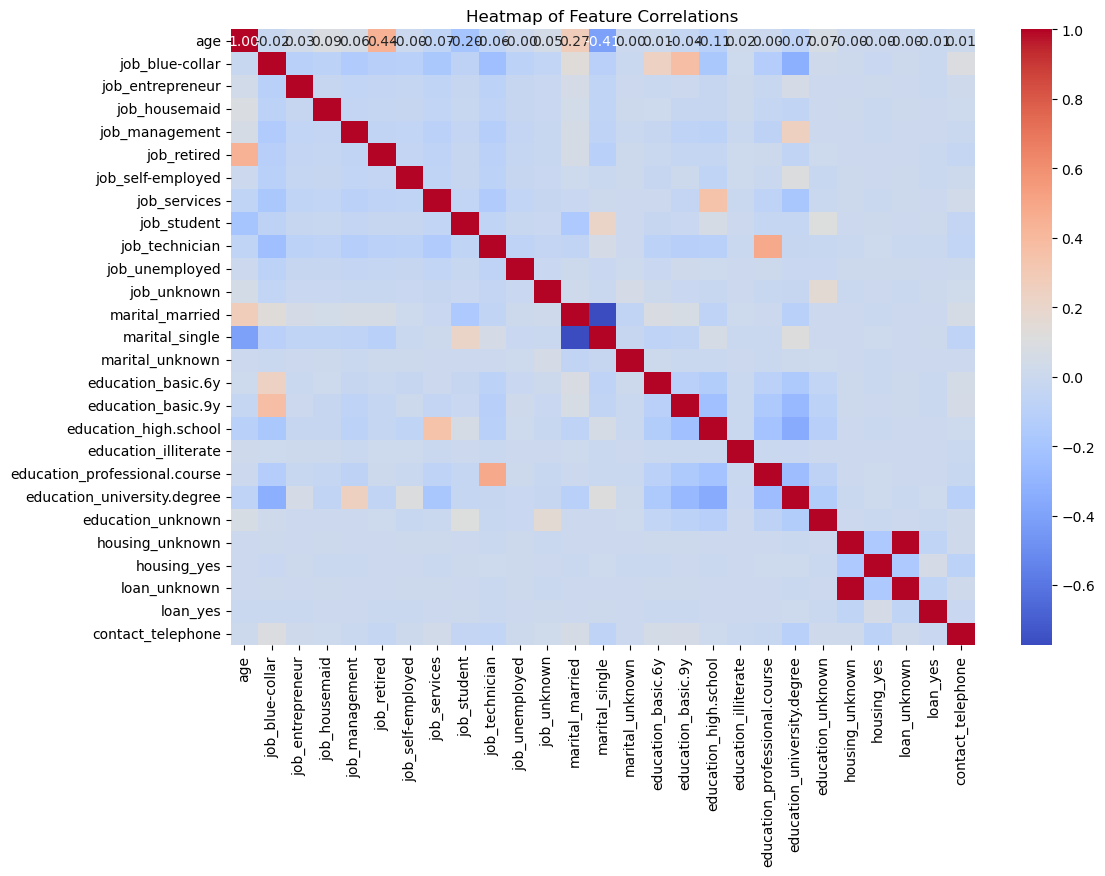

In [13]:
plt.figure(figsize=(12, 8))
correlation_matrix = X_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlations')
plt.show()

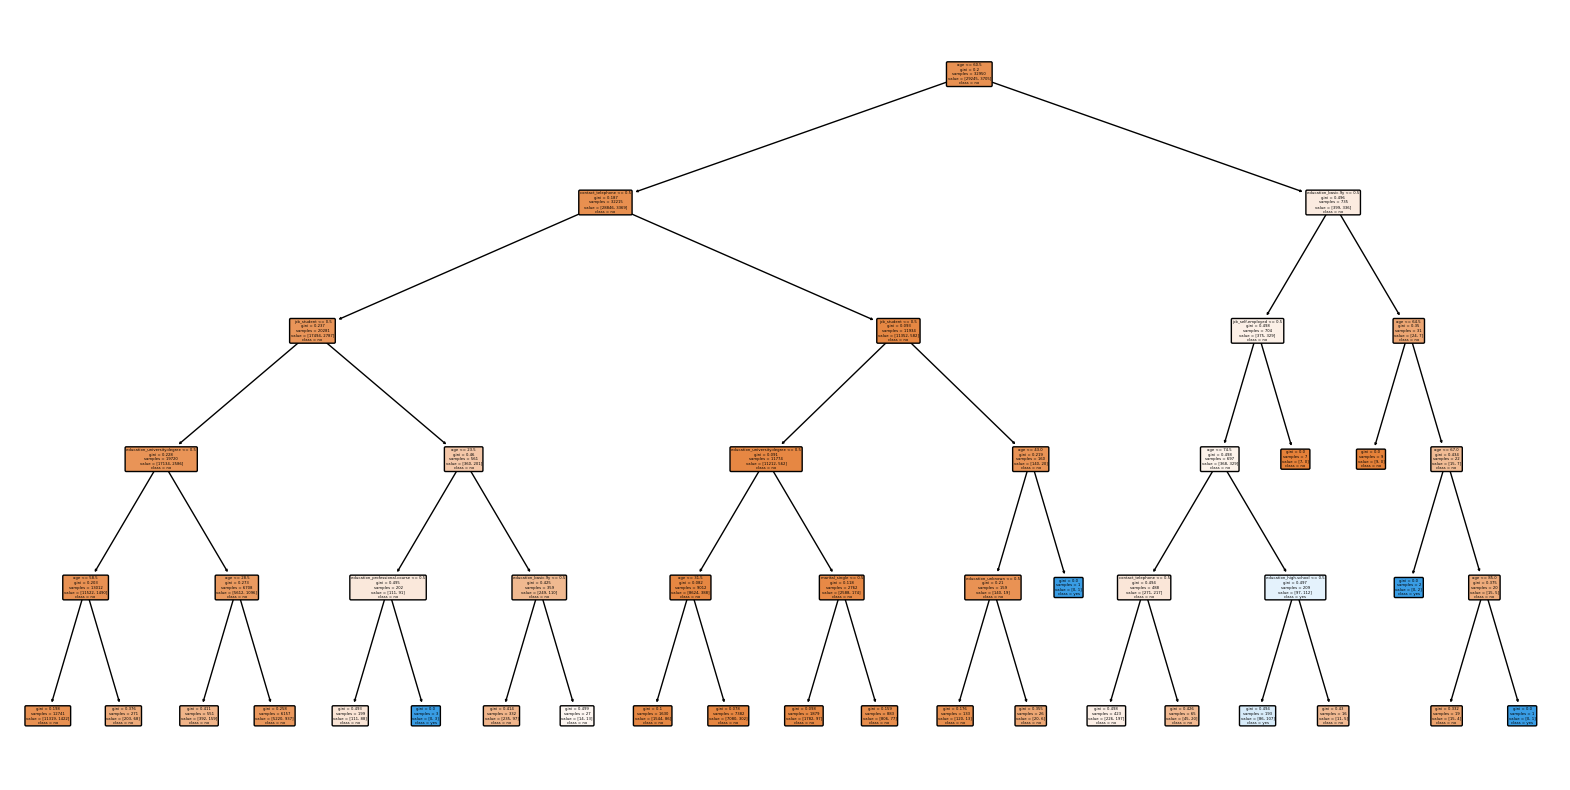

In [14]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X_encoded.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.show()